# Import Library

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

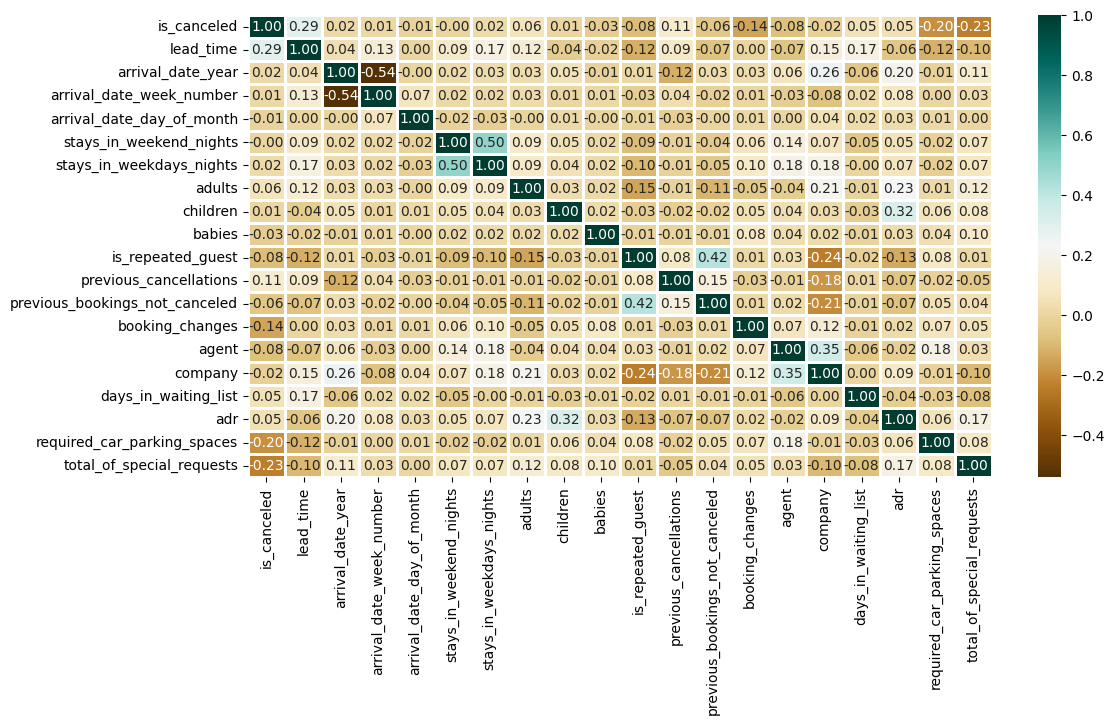

In [8]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)
plt.show()

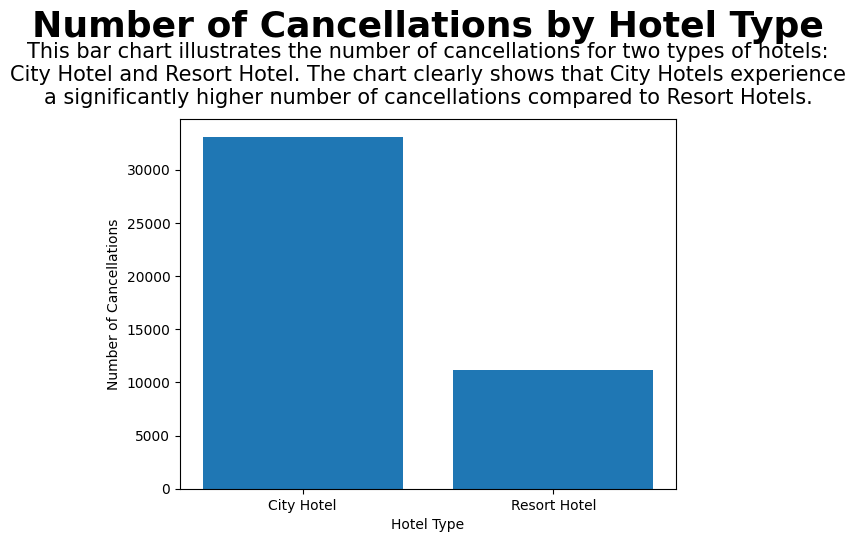

In [9]:
# Sample data
hotel_types = ['City Hotel', 'Resort Hotel']
cancellations = [33102, 11122]

fig, ax = plt.subplots()
ax.bar(hotel_types, cancellations)
ax.set_xlabel('Hotel Type')
ax.set_ylabel('Number of Cancellations')
ax.set_title('Number of Cancellations by Hotel Type',fontsize=26, fontweight='bold', y=1.2)

# Correct way to use transform
text = (
    'This bar chart illustrates the number of cancellations for two types of hotels:\n'
    'City Hotel and Resort Hotel. The chart clearly shows that City Hotels experience\n'
    'a significantly higher number of cancellations compared to Resort Hotels.'
)
ax.text(0.5, 1.04, text, size=15, ha='center', transform=ax.transAxes)

plt.show()


   arrival_date_month  is_canceled
4             January         2122
3            February         2371
7               March         1807
0               April         2696
8                 May         3149
6                June         4524
5                July         4677
1              August         4535
11          September         4742
10            October         5239
9            November         4116
2            December         4246


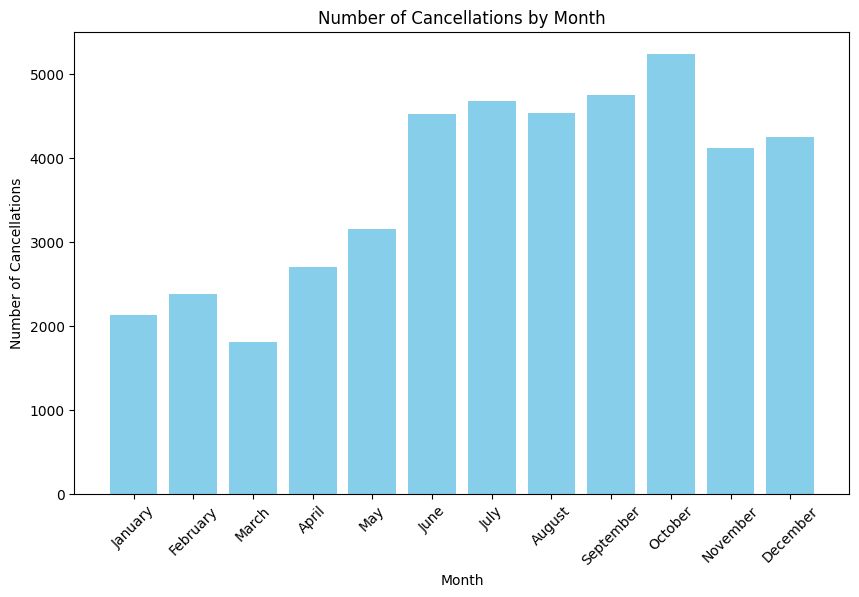

In [10]:
# Grouping data by month and counting the number of cancellations
cancellation_by_month = df.groupby('arrival_date_month')['is_canceled'].sum().reset_index()

# Arranging the months in chronological order
bulan_berurutan = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cancellation_by_month['arrival_date_month'] = pd.Categorical(cancellation_by_month['arrival_date_month'], categories=bulan_berurutan, ordered=True)
cancellation_by_month = cancellation_by_month.sort_values('arrival_date_month')

# Displaying results
print(cancellation_by_month)

# Creating visualizations
plt.figure(figsize=(10, 6))
plt.bar(cancellation_by_month['arrival_date_month'], cancellation_by_month['is_canceled'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.title('Number of Cancellations by Month')
plt.xticks(rotation=45)
plt.show()


   arrival_date_month  is_canceled
4             January    31.233441
3            February    34.970501
7               March    30.477315
0               April    33.415964
8                 May    32.152338
6                June    40.797186
5                July    39.665847
1              August    41.457172
11          September    37.453598
10            October    37.753117
9            November    39.170156
2            December    38.046595


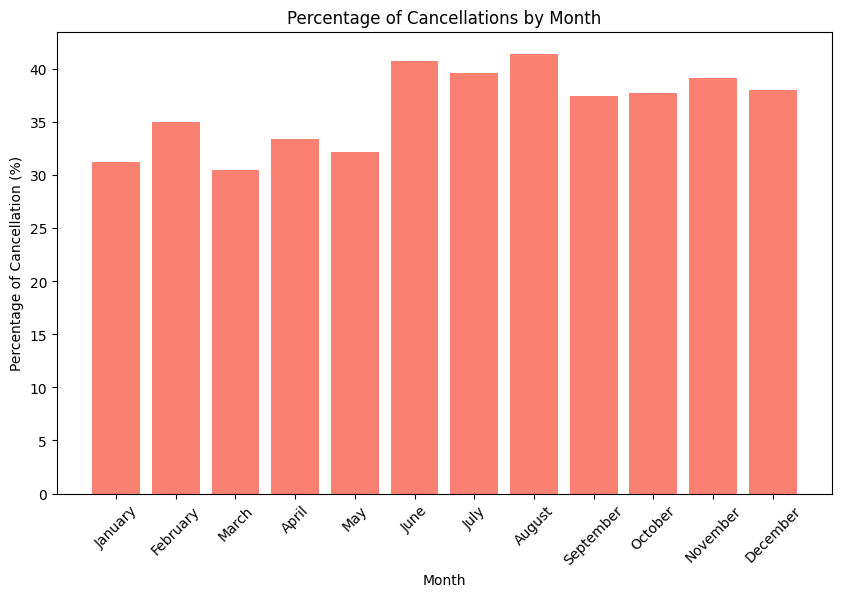

In [11]:
# Grouping data by month and calculating the percentage of cancellations
cancellation_rate_by_month = df.groupby('arrival_date_month')['is_canceled'].mean().reset_index()

# Convert to percentage
cancellation_rate_by_month['is_canceled'] *= 100

# Arranging the months in chronological order
cancellation_rate_by_month['arrival_date_month'] = pd.Categorical(cancellation_rate_by_month['arrival_date_month'], categories=bulan_berurutan, ordered=True)
cancellation_rate_by_month = cancellation_rate_by_month.sort_values('arrival_date_month')

# Displaying results
print(cancellation_rate_by_month)

# Creating visualizations
plt.figure(figsize=(10, 6))
plt.bar(cancellation_rate_by_month['arrival_date_month'], cancellation_rate_by_month['is_canceled'], color='salmon')
plt.xlabel('Month')
plt.ylabel('Percentage of Cancellation (%)')
plt.title('Percentage of Cancellations by Month')
plt.xticks(rotation=45)
plt.show()


   arrival_date_year  is_canceled
0               2017         8142
1               2018        20337
2               2019        15745


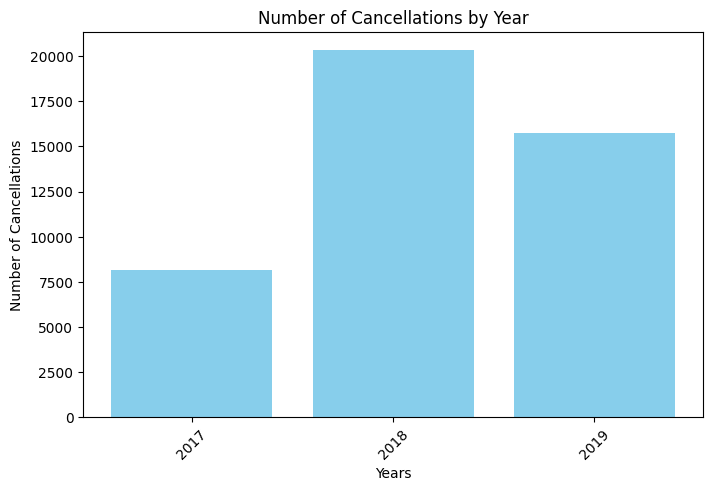

In [12]:
# Grouping data by year and calculating the number of cancellations
cancellation_by_year = df.groupby('arrival_date_year')['is_canceled'].sum().reset_index()

# Displaying results
print(cancellation_by_year)

# Creating visualizations
plt.figure(figsize=(8, 5))
plt.bar(cancellation_by_year['arrival_date_year'].astype(str), cancellation_by_year['is_canceled'], color='skyblue')
plt.xlabel('Years')
plt.ylabel('Number of Cancellations')
plt.title('Number of Cancellations by Year')
plt.xticks(rotation=45)
plt.show()


   arrival_date_year  count
2               2017  21996
0               2018  56707
1               2019  40687


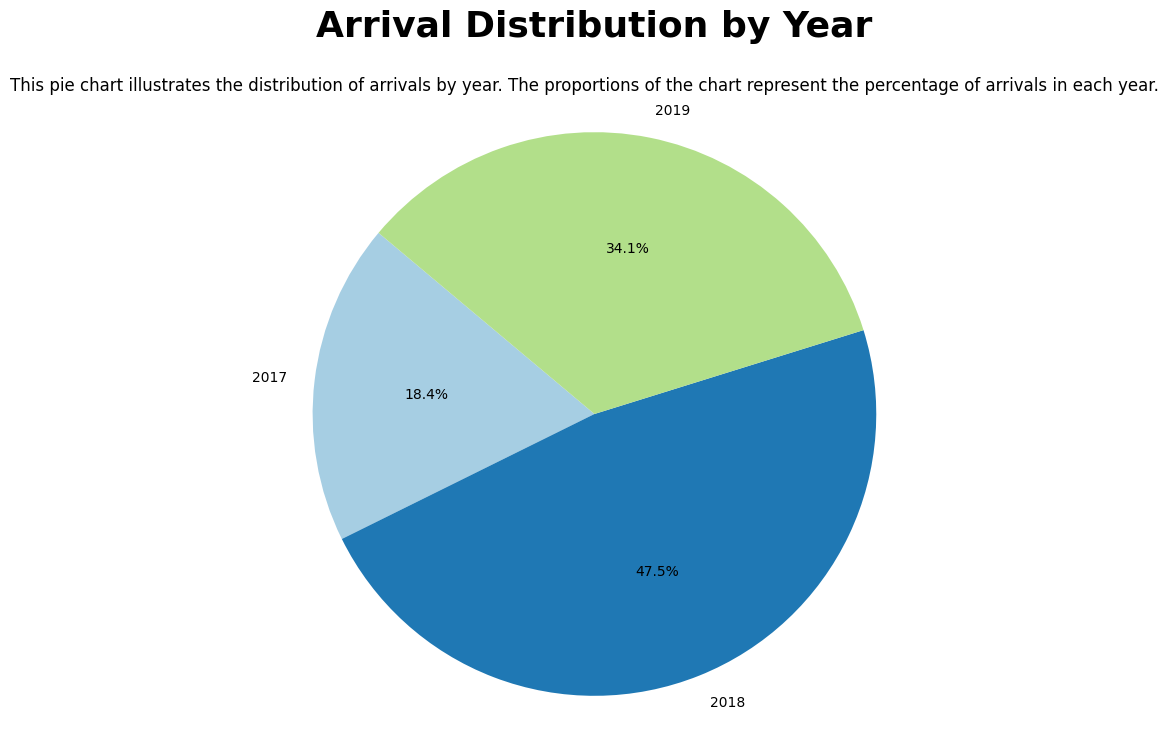

In [13]:
# Calculating the number of arrivals by year
arrival_counts = df['arrival_date_year'].value_counts().reset_index()
arrival_counts.columns = ['arrival_date_year', 'count']

# Sorting data by year
arrival_counts = arrival_counts.sort_values('arrival_date_year')

# Displaying results
print(arrival_counts)

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(arrival_counts['count'], 
        labels=arrival_counts['arrival_date_year'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors)
plt.title('Arrival Distribution by Year', fontsize=26, fontweight='bold', y=1.1)

# If you need a text annotation, you can add it separately as a note in the plot or in the figure's text
plt.figtext(0.5, 0.9, 
            'This pie chart illustrates the distribution of arrivals by year. The proportions of the chart represent the percentage of arrivals in each year.', 
            ha='center', 
            size=12)

plt.axis('equal')
plt.show()


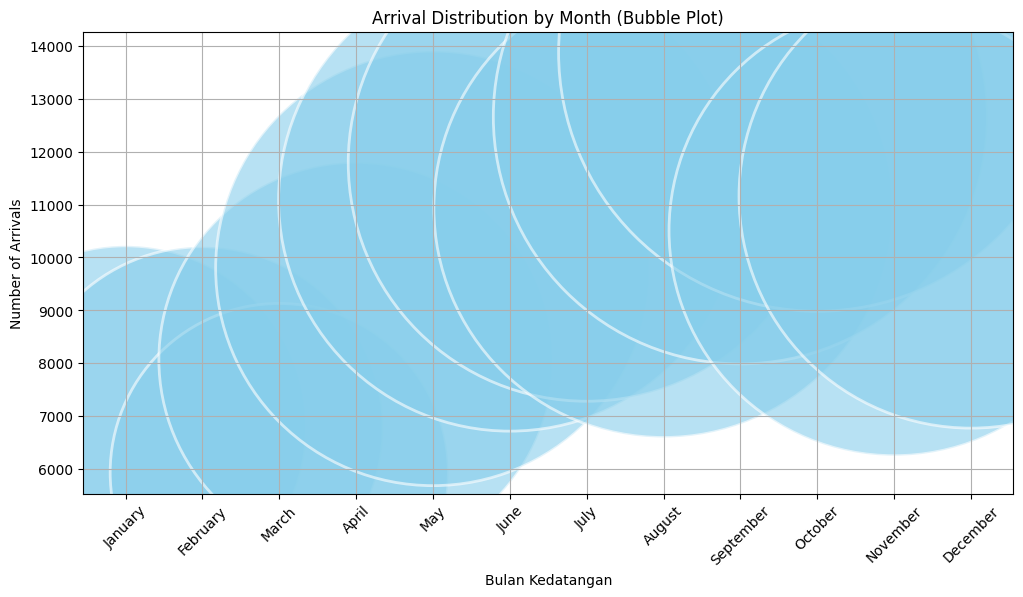

In [14]:
# Calculate the number of arrivals by month
arrival_counts_by_month = df['arrival_date_month'].value_counts().reset_index()
arrival_counts_by_month.columns = ['arrival_date_month', 'count']

# Arranging the months in chronological order
bulan_berurutan = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
arrival_counts_by_month['arrival_date_month'] = pd.Categorical(arrival_counts_by_month['arrival_date_month'], categories=bulan_berurutan, ordered=True)
arrival_counts_by_month = arrival_counts_by_month.sort_values('arrival_date_month')

# Creating bubble plots
plt.figure(figsize=(12, 6))
plt.scatter(arrival_counts_by_month['arrival_date_month'], arrival_counts_by_month['count'],
            s=arrival_counts_by_month['count']*10,  # Ukuran bubble berdasarkan jumlah
            color='skyblue', alpha=0.6, edgecolor='w', linewidth=2)
plt.title('Arrival Distribution by Month (Bubble Plot)')
plt.xlabel('Bulan Kedatangan')
plt.ylabel('Number of Arrivals')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


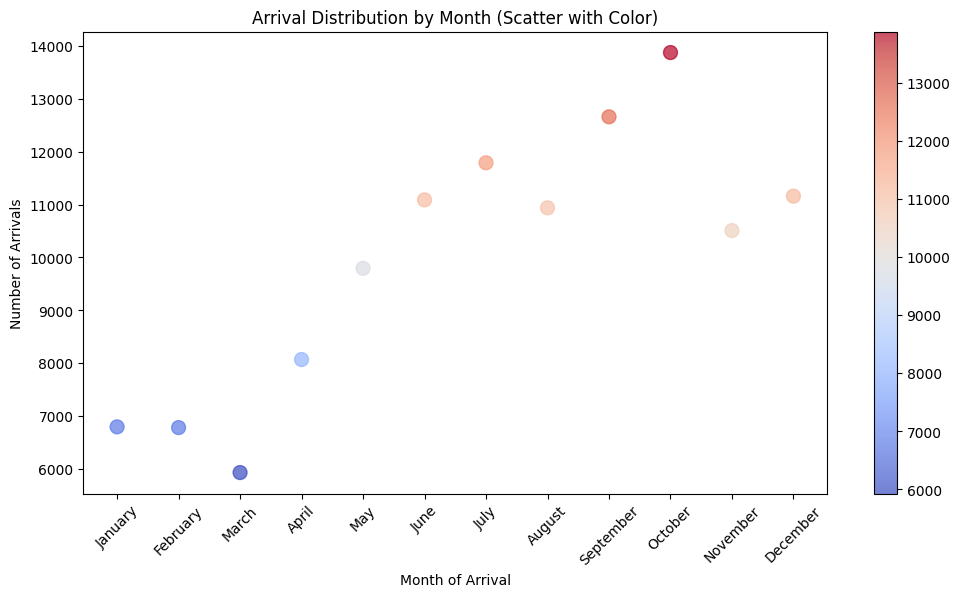

In [15]:
# Menghitung jumlah kedatangan berdasarkan bulan
arrival_counts_by_month = df['arrival_date_month'].value_counts().reset_index()
arrival_counts_by_month.columns = ['arrival_date_month', 'count']

# Menyusun bulan dalam urutan kronologis
bulan_berurutan = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
arrival_counts_by_month['arrival_date_month'] = pd.Categorical(arrival_counts_by_month['arrival_date_month'], categories=bulan_berurutan, ordered=True)
arrival_counts_by_month = arrival_counts_by_month.sort_values('arrival_date_month')

# Membuat scatter plot dengan pemetaan warna
plt.figure(figsize=(12, 6))
scatter = plt.scatter(arrival_counts_by_month['arrival_date_month'], arrival_counts_by_month['count'],
                      c=arrival_counts_by_month['count'], cmap='coolwarm', s=100, alpha=0.7)
plt.title('Arrival Distribution by Month (Scatter with Color)')
plt.xlabel('Month of Arrival')
plt.ylabel('Number of Arrivals')
plt.xticks(rotation=45)
plt.colorbar(scatter)
plt.show()


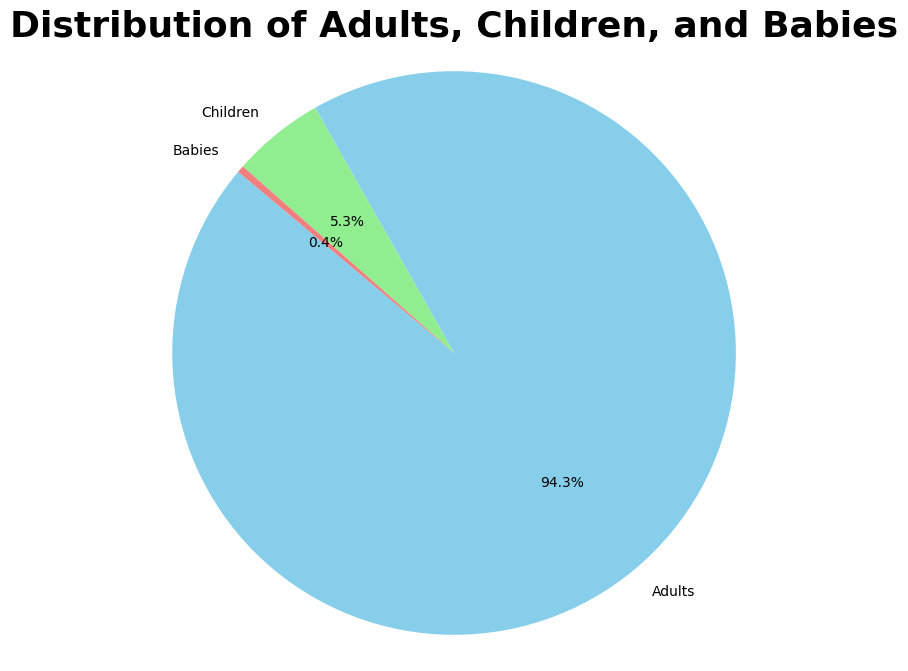

In [16]:
# Count the number of each category
adults_count = df['adults'].sum()
children_count = df['children'].sum()
babies_count = df['babies'].sum()

# Data for Pie Chart
categories = ['Adults', 'Children', 'Babies']
counts = [adults_count, children_count, babies_count]

# Creating a Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(counts, 
        labels=categories, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Adults, Children, and Babies', fontsize=26, fontweight='bold')

plt.axis('equal')
plt.show()


In [17]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


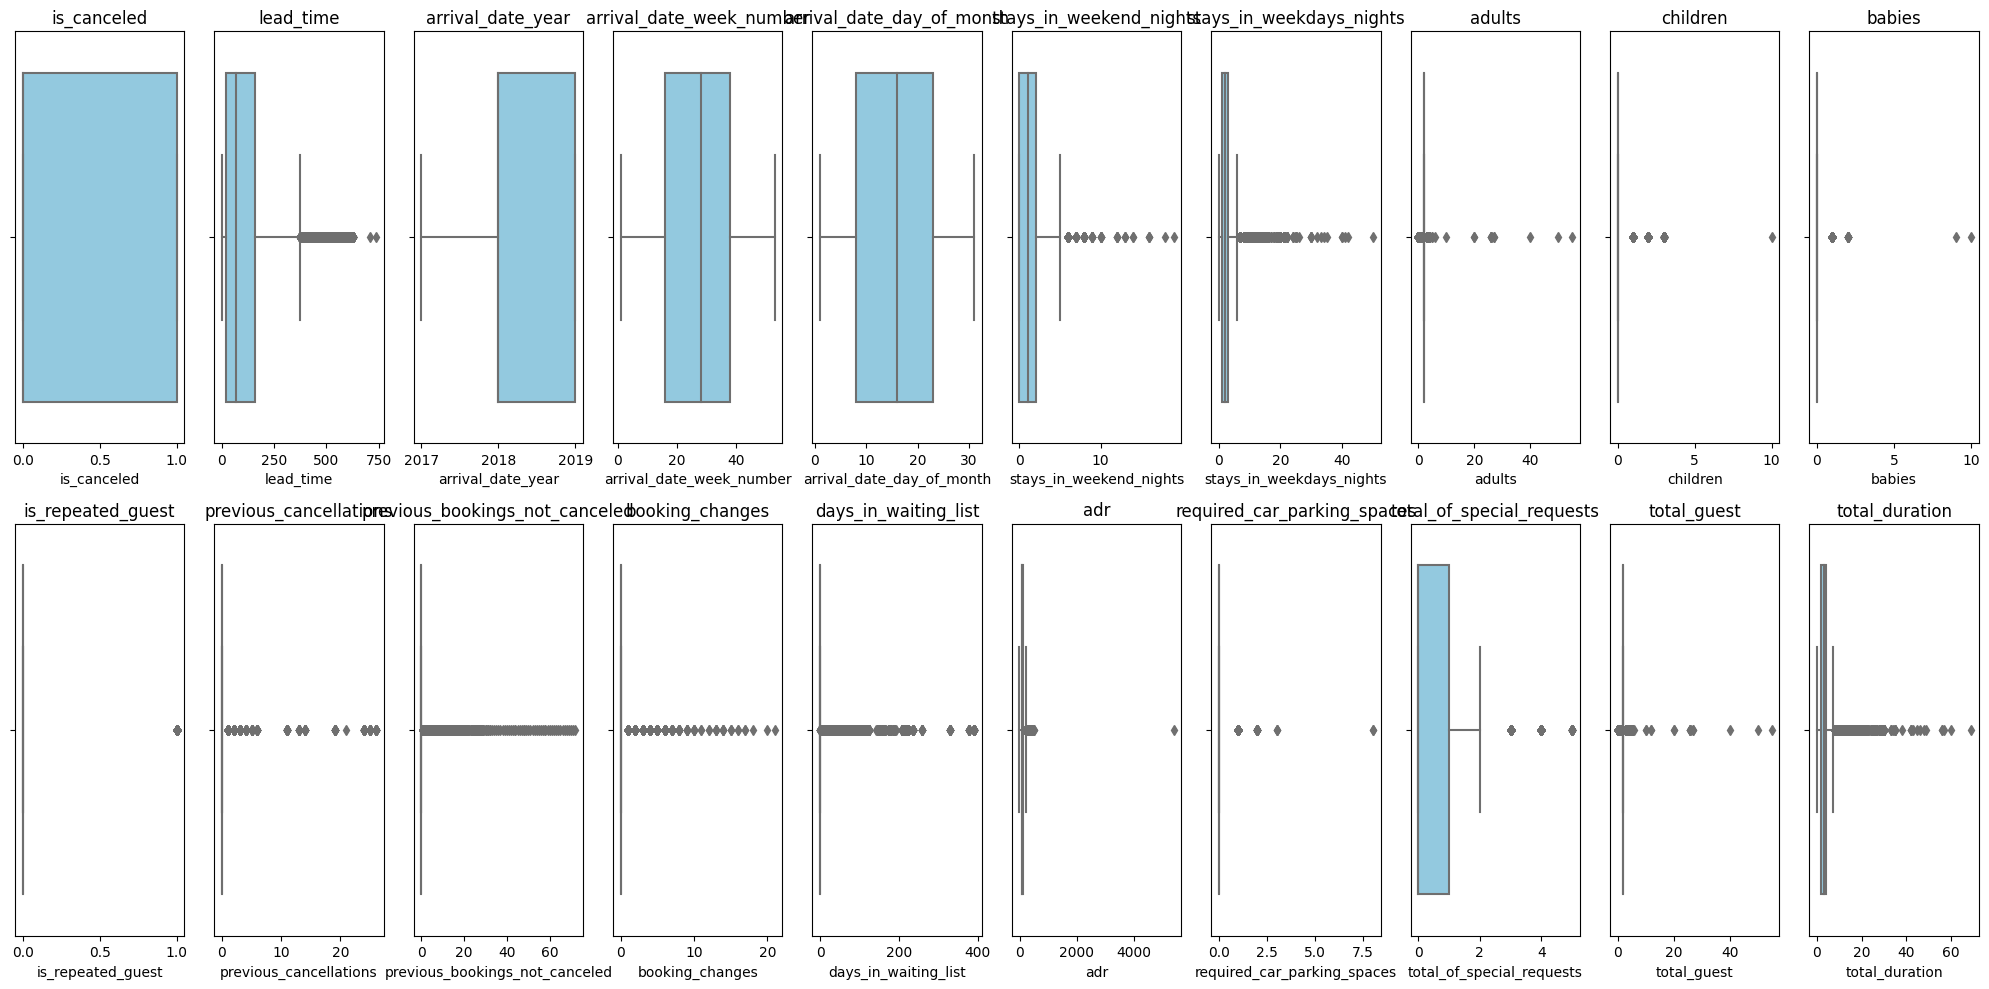

In [53]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Set figure size
plt.figure(figsize=(20, 10))

# Create boxplots for each numeric column
for i in range(0, len(numeric_columns)):
    plt.subplot(2, 10, i + 1)  # 2 rows, 10 columns for subplots
    sns.boxplot(x=df[numeric_columns[i]], color='skyblue', orient='h')  # Using Seaborn for boxplot
    plt.title(numeric_columns[i])  # Add title for each subplot
    plt.tight_layout()

plt.show()


# Data Preprocessing

### Handle missing Value

In [19]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [20]:
df['city'] = df['city'].fillna(str)
df['children'] = df['children'].fillna(int)
df['agent'] = df['agent'].fillna(int)
df['company'] = df['company'].fillna(int)


In [21]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [22]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [23]:
# Replace the values that don't match
df['meal'].replace('Undefined', 'Lunch', inplace=True)

In [24]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Lunch'],
      dtype=object)

In [25]:
df['children'].unique()

# Replace invalid values (e.g. <class 'int'>) with 0 or an appropriate value
df['children'] = df['children'].apply(lambda x: 0 if isinstance(x, type) else x)

# Convert all values to integer
df['children'] = df['children'].astype(float).astype(int)

# Recheck unique values after cleanup
print(df['children'].unique())

[ 0  1  2 10  3]


In [26]:
# Making coloum total guest
df['total_guest'] = df['adults'] + df['children'] + df['babies']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int32  
 11  babies                          119390 non-null  int64  
 12  meal            

In [27]:
df_filtered = df[(df['total_guest'] >= 1) & (df['total_guest'] <=50 )]
df_filtered.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,No Deposit,<class 'int'>,<class 'int'>,0,Personal,0.0,0,0,Check-Out,2
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,No Deposit,<class 'int'>,<class 'int'>,0,Personal,0.0,0,0,Check-Out,2
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,No Deposit,<class 'int'>,<class 'int'>,0,Personal,75.0,0,0,Check-Out,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304.0,<class 'int'>,0,Personal,75.0,0,0,Check-Out,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240.0,<class 'int'>,0,Personal,98.0,0,1,Check-Out,2


In [28]:
df['arrival_date_month'].unique()

array(['September', 'October', 'November', 'December', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August'],
      dtype=object)

In [29]:
# Grouping data based on 'arrival_date_month', 'arrival_date_year', and 'hotel'
df_grouped = df.groupby(['arrival_date_month', 'arrival_date_year', 'hotel']).size().reset_index(name='count')

df_grouped

,arrival_date_month,arrival_date_year,hotel,count
0,April,2018,City Hotel,2371
1,April,2018,Resort Hotel,1520
2,April,2019,City Hotel,2594
3,April,2019,Resort Hotel,1583
4,August,2018,City Hotel,3923
5,August,2018,Resort Hotel,1369
6,August,2019,City Hotel,3971
7,August,2019,Resort Hotel,1676
8,December,2017,City Hotel,3386
9,December,2017,Resort Hotel,1571


In [30]:
# Create a pivot table from groupby results
pivot_table = df_grouped.pivot_table(
    index='arrival_date_month', 
    columns='hotel', 
    values='count', 
    aggfunc='sum', 
    fill_value=0
)


# Sorting by month order
order_of_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
pivot_table = pivot_table.reindex(order_of_months)

print(pivot_table)

hotel               City Hotel  Resort Hotel
arrival_date_month                          
January                   4357          2437
February                  4132          2648
March                     3736          2193
April                     4965          3103
May                       6458          3336
June                      7480          3609
July                      8232          3559
August                    7894          3045
September                 8088          4573
October                   8983          4894
November                  7400          3108
December                  7605          3555


In [31]:
# Convert index 'arrival_date_month' to sorted categories
pivot_table.index = pd.Categorical(pivot_table.index, categories=order_of_months, ordered=True)
pivot_table = pivot_table.sort_index()

# Normalize data using the Min-Max method for each hotel column
pivot_table_normalized = (pivot_table - pivot_table.min()) / (pivot_table.max() - pivot_table.min())

print("Pivot Table After Normalization:")
print(pivot_table_normalized)

Pivot Table After Normalization:
hotel      City Hotel  Resort Hotel
January      0.118353      0.090337
February     0.075472      0.168456
March        0.000000      0.000000
April        0.234229      0.336912
May          0.518773      0.423177
June         0.713551      0.524250
July         0.856871      0.505739
August       0.792453      0.315439
September    0.829426      0.881155
October      1.000000      1.000000
November     0.698304      0.338763
December     0.737374      0.504258


# Visualization

In [32]:
# Using Normalized Z-Score
pivot_table_normalized_zscore = (pivot_table - pivot_table.mean()) / pivot_table.std()

print("Pivot Table After Z-Score Normalization:")
print(pivot_table_normalized_zscore)


Pivot Table After Z-Score Normalization:
hotel      City Hotel  Resort Hotel
January     -1.234391     -1.137328
February    -1.357620     -0.871082
March       -1.574504     -1.445214
April       -0.901399     -0.296950
May         -0.083705     -0.002944
June         0.476030      0.341535
July         0.887889      0.278443
August       0.702771     -0.370136
September    0.809022      1.557937
October      1.299201      1.962984
November     0.432215     -0.290641
December     0.544490      0.273396


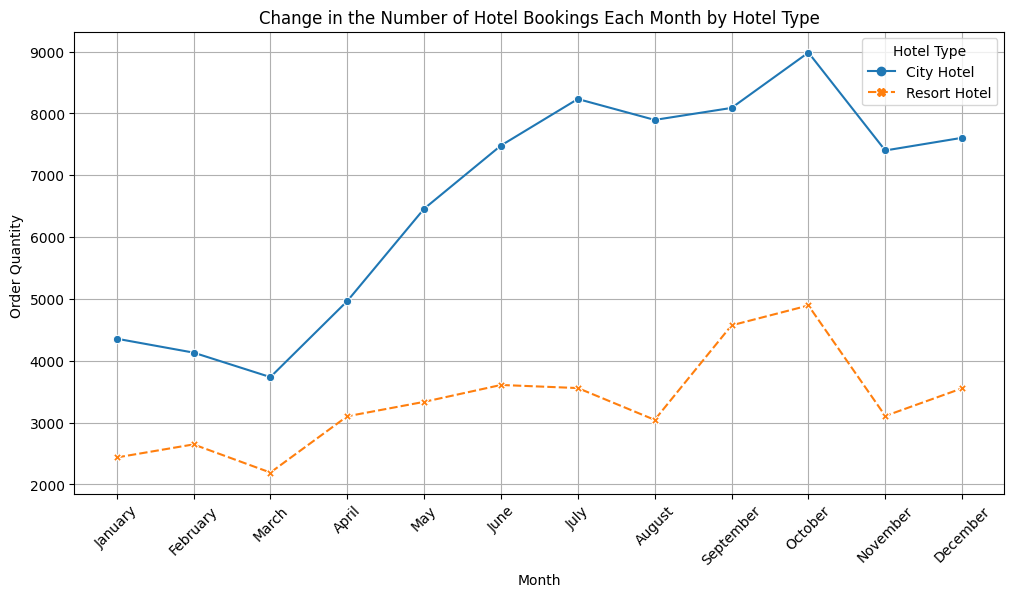

In [33]:
# Plot with seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_table, markers=True)
plt.title('Change in the Number of Hotel Bookings Each Month by Hotel Type')
plt.xlabel('Month')
plt.ylabel('Order Quantity ')
plt.xticks(rotation=45)
plt.legend(title='Hotel Type')
plt.grid(True)
plt.show()

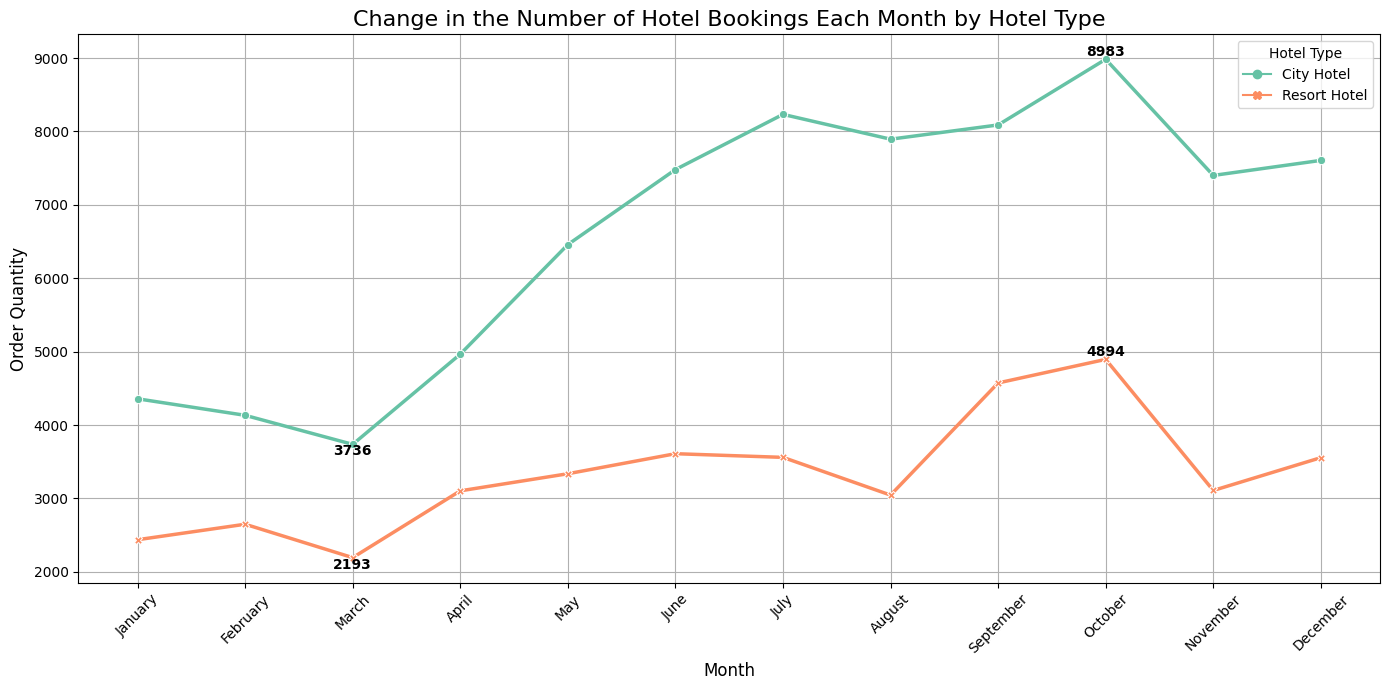

In [34]:
# Plot with seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(data=pivot_table, markers=True, dashes=False, palette='Set2', linewidth=2.5)

# Add annotations for maximum and minimum values
for hotel in pivot_table.columns:
    max_value = pivot_table[hotel].max()
    max_month = pivot_table[pivot_table[hotel] == max_value].index[0]
    plt.text(max_month, max_value, f'{max_value}', color='black', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    min_value = pivot_table[hotel].min()
    min_month = pivot_table[pivot_table[hotel] == min_value].index[0]
    plt.text(min_month, min_value, f'{min_value}', color='black', ha='center', va='top', fontsize=10, fontweight='bold')

# Additional configuration of the plot
plt.title('Change in the Number of Hotel Bookings Each Month by Hotel Type', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Order Quantity', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Hotel Type', fontsize=10)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

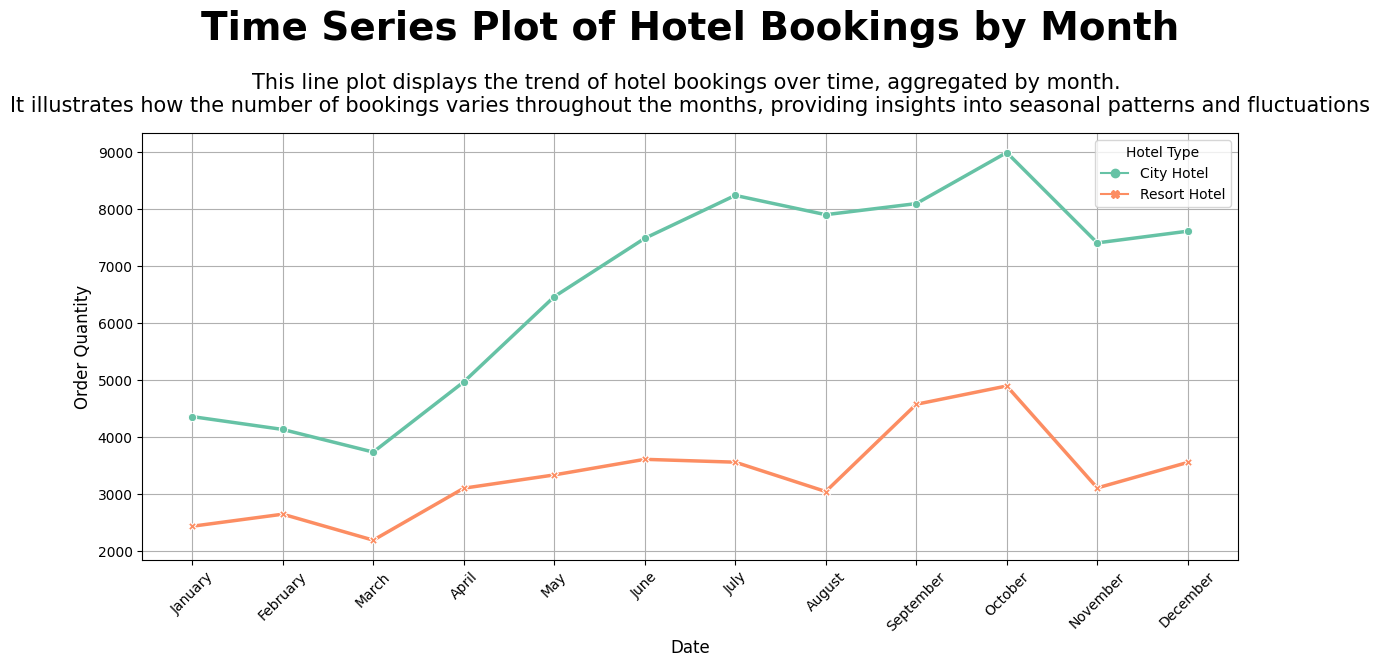

In [35]:
plt.figure(figsize=(14, 7))
ax = sns.lineplot(data=pivot_table, markers=True, dashes=False, palette='Set2', linewidth=2.5)

# Additional configurations for plots
plt.title('Time Series Plot of Hotel Bookings by Month', fontsize=28, fontweight='bold', y=1.2)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Order Quantity', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Hotel Type', fontsize=10)
plt.grid(True)

# Adding text annotation
ax.text(0.5, 1.05, 
        'This line plot displays the trend of hotel bookings over time, aggregated by month. \n'
        'It illustrates how the number of bookings varies throughout the months, providing insights into seasonal patterns and fluctuations', 
        size=15, ha='center', transform=ax.transAxes)

plt.tight_layout()
plt.show()





In [36]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,No Deposit,<class 'int'>,<class 'int'>,0,Personal,0.0,0,0,Check-Out,2
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,No Deposit,<class 'int'>,<class 'int'>,0,Personal,0.0,0,0,Check-Out,2
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,No Deposit,<class 'int'>,<class 'int'>,0,Personal,75.0,0,0,Check-Out,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304.0,<class 'int'>,0,Personal,75.0,0,0,Check-Out,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240.0,<class 'int'>,0,Personal,98.0,0,1,Check-Out,2


In [37]:
df['total_duration'] = df['stays_in_weekdays_nights'] + df['stays_in_weekend_nights']


df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,total_duration
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,<class 'int'>,<class 'int'>,0,Personal,0.0,0,0,Check-Out,2,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,<class 'int'>,<class 'int'>,0,Personal,0.0,0,0,Check-Out,2,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,<class 'int'>,<class 'int'>,0,Personal,75.0,0,0,Check-Out,1,1


In [38]:
df['total_duration'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7, 14, 15, 10, 11,  8,  9, 21, 13, 12,
       18, 46, 28, 17, 19, 22, 23, 16, 29, 42, 20, 26, 33, 30, 56, 25, 27,
       60, 69, 35, 45, 38, 24, 48, 49, 57, 34, 43], dtype=int64)

In [39]:
def stay_categorize(duration):
    if duration <=3:
        return 'Short Stay'
    elif duration <= 7:
        return 'Medium Stay'
    else:
        return 'Long Stay'

df['stay_duration_category'] = df['total_duration'].apply(stay_categorize)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,total_duration,stay_duration_category
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,<class 'int'>,0,Personal,0.0,0,0,Check-Out,2,0,Short Stay
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,<class 'int'>,0,Personal,0.0,0,0,Check-Out,2,0,Short Stay
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,<class 'int'>,0,Personal,75.0,0,0,Check-Out,1,1,Short Stay
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,<class 'int'>,0,Personal,75.0,0,0,Check-Out,1,1,Short Stay
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,<class 'int'>,0,Personal,98.0,0,1,Check-Out,2,2,Short Stay


In [40]:
agg_df = df.groupby(['hotel', 'total_duration']).agg(
        total_bookings = ('is_canceled' ,'count'),
        total_canceled = ('is_canceled', 'sum')
).reset_index()

# Calculate the proportion of canceled orders
agg_df['cancelation_rate'] = agg_df['total_canceled'] / agg_df['total_bookings']

# Show results
agg_df.head(10)

,hotel,total_duration,total_bookings,total_canceled,cancelation_rate
0,City Hotel,0,331,23,0.069486
1,City Hotel,1,13272,4103,0.309147
2,City Hotel,2,21426,10434,0.486978
3,City Hotel,3,21381,9486,0.443665
4,City Hotel,4,12557,4853,0.386478
5,City Hotel,5,4997,1776,0.355413
6,City Hotel,6,2059,943,0.457989
7,City Hotel,7,2059,808,0.392424
8,City Hotel,8,385,176,0.457143
9,City Hotel,9,213,93,0.436620


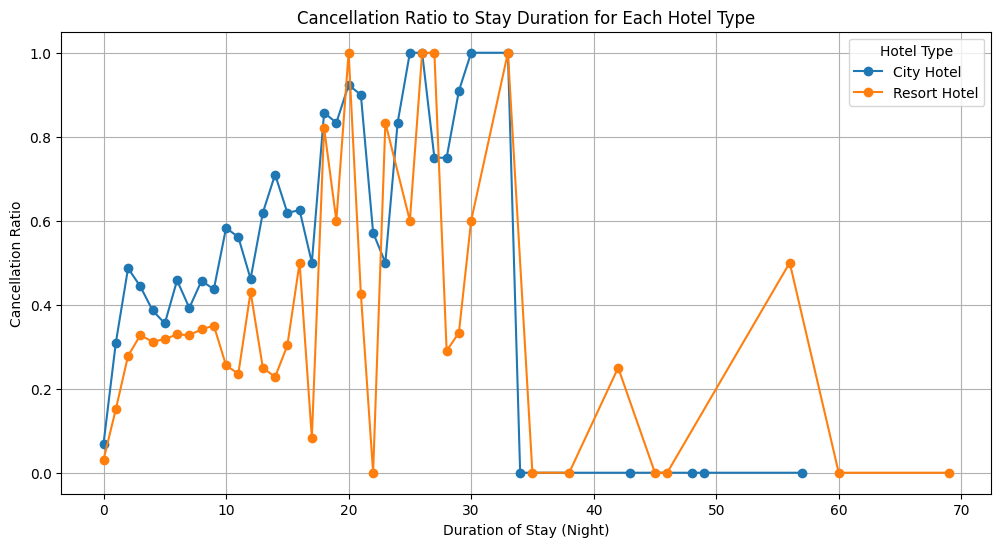

In [41]:
# Cancellation ratio plot
plt.figure(figsize=(12, 6))

# Drawing line plot
for hotel_type in agg_df['hotel'].unique():
    hotel_data = agg_df[agg_df['hotel'] == hotel_type]
    plt.plot(hotel_data['total_duration'], hotel_data['cancelation_rate'], marker='o', label=hotel_type)

plt.xlabel('Duration of Stay (Night)')
plt.ylabel('Cancellation Ratio')
plt.title('Cancellation Ratio to Stay Duration for Each Hotel Type')
plt.legend(title='Hotel Type')
plt.grid(True)
plt.show()

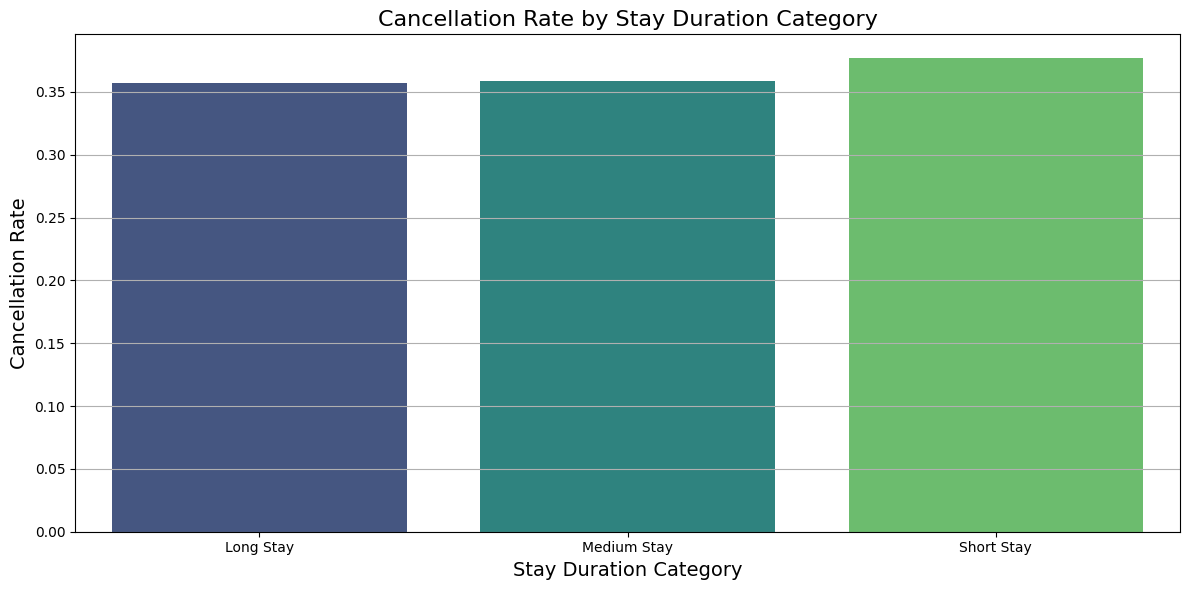

In [42]:
df['arrival_date_month'] = df['arrival_date_month'].astype(str)
df['date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-01')

# Aggregate data by stay duration category
agg_duration_df = df.groupby('stay_duration_category').agg(
    total_bookings = ('is_canceled', 'count'),
    total_canceled = ('is_canceled', 'sum')
).reset_index()
agg_duration_df['cancelation_rate'] = agg_duration_df['total_canceled'] / agg_duration_df['total_bookings']

# Plot the cancellation rate by stay duration category
plt.figure(figsize=(12, 6))
sns.barplot(x='stay_duration_category', y='cancelation_rate', data=agg_duration_df, palette='viridis')

# Adding titles and labels
plt.title('Cancellation Rate by Stay Duration Category', fontsize=16)
plt.xlabel('Stay Duration Category', fontsize=14)
plt.ylabel('Cancellation Rate', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()


In [43]:
agg_df.head(10)

,hotel,total_duration,total_bookings,total_canceled,cancelation_rate
0,City Hotel,0,331,23,0.069486
1,City Hotel,1,13272,4103,0.309147
2,City Hotel,2,21426,10434,0.486978
3,City Hotel,3,21381,9486,0.443665
4,City Hotel,4,12557,4853,0.386478
5,City Hotel,5,4997,1776,0.355413
6,City Hotel,6,2059,943,0.457989
7,City Hotel,7,2059,808,0.392424
8,City Hotel,8,385,176,0.457143
9,City Hotel,9,213,93,0.436620


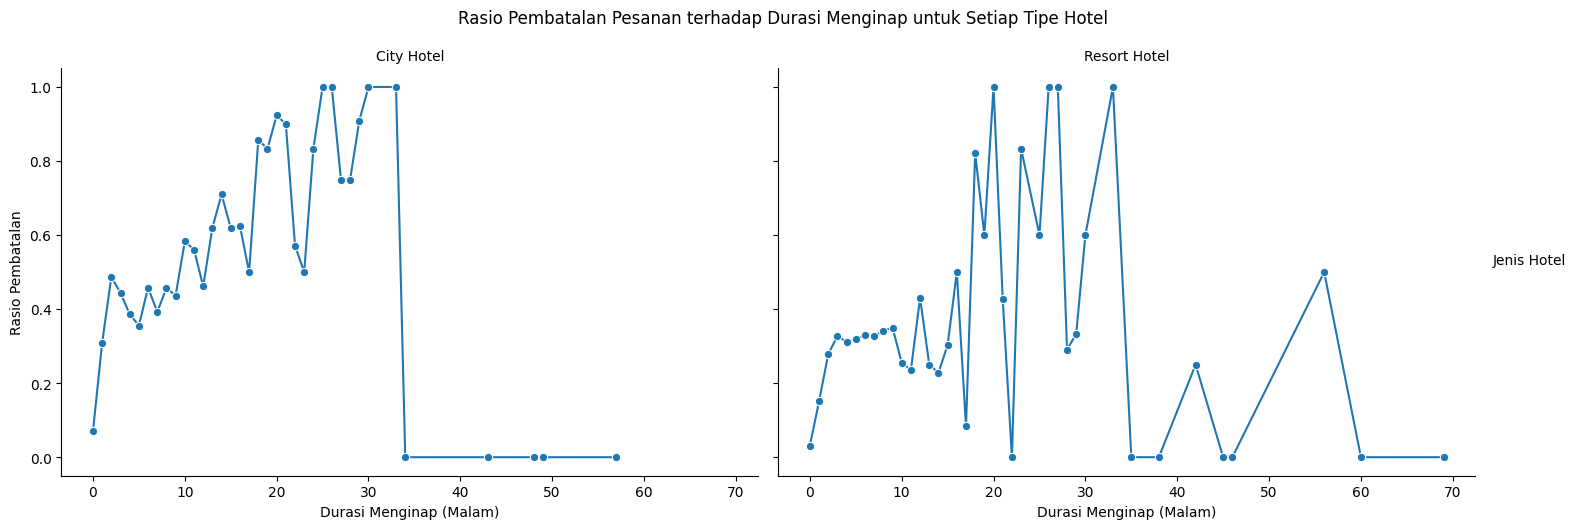

In [44]:
# Membuat FacetGrid
g = sns.FacetGrid(agg_df, col='hotel', col_wrap=2, height=5, aspect=1.5)
g.map(sns.lineplot, 'total_duration', 'cancelation_rate', marker='o')

g.set_axis_labels('Durasi Menginap (Malam)', 'Rasio Pembatalan')
g.set_titles(col_template="{col_name}")
g.add_legend(title='Jenis Hotel')
plt.suptitle('Rasio Pembatalan Pesanan terhadap Durasi Menginap untuk Setiap Tipe Hotel', y=1.05)
plt.show()

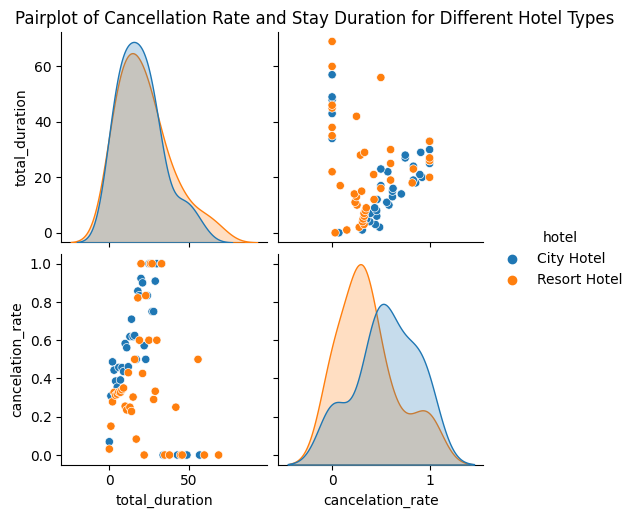

In [45]:
# Pairplots to explore the relationship between variables
sns.pairplot(agg_df, hue='hotel', vars=['total_duration', 'cancelation_rate'])

plt.suptitle('Pairplot of Cancellation Rate and Stay Duration for Different Hotel Types', y=1.02)
plt.show()


In [46]:
# Define category boundaries (bin edges)
bins = [0, 7, 30, 90, 180, float('inf')]

# Define a label for each category
labels = ['Very Short', 'Short', 'Medium', 
          'Long', 'Very Long']

# Create new column 'lead_time_category' based on lead_time
df['lead_time_category'] = pd.cut(df['lead_time'], bins=bins, labels=labels, right=False)

# Display a few lines to make sure
print(df[['lead_time', 'lead_time_category']].head())


   lead_time lead_time_category
0        342          Very Long
1        737          Very Long
2          7              Short
3         13              Short
4         14              Short


In [47]:
# Calculate the proportion of cancelation
agg_df['cancelation_rate'] = agg_df['total_canceled'] / agg_df['total_bookings']

# Show aggregate table
agg_df.head()

,hotel,total_duration,total_bookings,total_canceled,cancelation_rate
0,City Hotel,0,331,23,0.069486
1,City Hotel,1,13272,4103,0.309147
2,City Hotel,2,21426,10434,0.486978
3,City Hotel,3,21381,9486,0.443665
4,City Hotel,4,12557,4853,0.386478


0


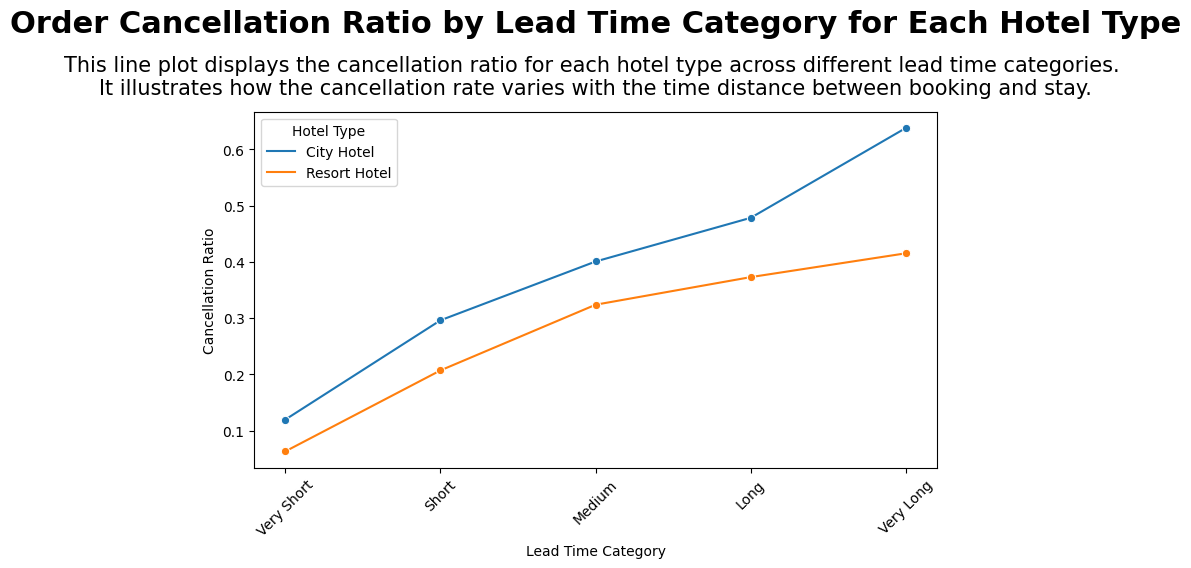

In [48]:
# Assuming `bins` and `labels` are already defined
df['lead_time_category'] = pd.cut(df['lead_time'], bins=bins, labels=labels, right=False)

# Check for any missing values in lead_time_category
print(df['lead_time_category'].isnull().sum())

# Remove rows with NaN values in lead_time_category
df = df.dropna(subset=['lead_time_category'])

# Group by hotel and lead_time_category, then calculate total bookings and cancellations
agg_df = df.groupby(['hotel', 'lead_time_category']).agg(
    total_bookings=('is_canceled', 'count'),
    canceled_bookings=('is_canceled', 'sum')
).reset_index()

# Calculate cancellation rate
agg_df['cancelation_rate'] = agg_df['canceled_bookings'] / agg_df['total_bookings']

# Ensure lead_time_category is sorted
agg_df = agg_df.sort_values('lead_time_category')

# Create plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=agg_df, x='lead_time_category', y='cancelation_rate', hue='hotel', marker="o")

# Add title and axis labels
plt.title('Order Cancellation Ratio by Lead Time Category for Each Hotel Type', fontsize=22, fontweight='bold', y=1.2)
plt.xlabel('Lead Time Category')
plt.ylabel('Cancellation Ratio')
plt.xticks(rotation=45)
plt.legend(title='Hotel Type')

# Add text annotation
ax.text(0.5, 1.05, 
        'This line plot displays the cancellation ratio for each hotel type across different lead time categories. \n'
        'It illustrates how the cancellation rate varies with the time distance between booking and stay.', 
        size=15, ha='center', transform=ax.transAxes)

# Display plot
plt.tight_layout()
plt.show()
